In [9]:
import pandas as pd
import os
data_path = '/Users/subashkhanal/Desktop/Lin_Lab/LinBrainLab/MLforMedicine/NACC/data/'
summary_path = '/Users/subashkhanal/Desktop/Lin_Lab/LinBrainLab/MLforMedicine/NACC/data/summary/'

df = pd.read_csv(os.path.join(data_path,'lin10232020.csv'))
data_dict = pd.read_csv(os.path.join(summary_path,'rdd_datadictionary_uds_np.csv'))
df

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,NPCPRION,NPPOTH1,NPCOTH1,NPOTH1X,NPPOTH2,NPCOTH2,NPOTH2X,NPPOTH3,NPCOTH3,NPOTH3X
0,NACC000546,354,I,2.0,7,8,2009,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NACC000546,354,F,2.0,8,10,2011,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NACC011853,354,I,2.0,5,7,2010,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NACC011853,354,F,2.0,7,18,2011,2,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NACC011853,354,T,2.0,9,11,2014,3,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15534,NACC943925,9661,F,3.0,2,20,2018,13,15,14,...,-4.0,-4.0,-4.0,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN
15535,NACC943925,9661,F,3.0,5,20,2019,14,15,14,...,-4.0,-4.0,-4.0,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN
15536,NACC943925,9661,T,3.0,4,30,2020,15,15,14,...,-4.0,-4.0,-4.0,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN
15537,NACC968945,9661,I,3.0,4,20,2018,1,2,2,...,-4.0,-4.0,-4.0,NaN,-4.0,-4.0,NaN,-4.0,-4.0,NaN


In [10]:
possible_AD_cols = [col for col in df.columns if 'AD' in col]


In [11]:
cols_defs = {
    'NACCADMD':'Reported current use of FDA-approved medication for AD symptoms',
    'NACCVNUM':'UDS visit number',
    'NACCAVST':'Total number of all UDS visits made',
    'NACCADC':'ADC at which subject was seen',
    'MOCADIGI':'MoCA: Attention - Digits',
    'FDGAD':'FDG-PET pattern of AD',
    'TAUPETAD':'Tau PET evidence for AD',
    'PROBAD':'Presumptive etiologic diagnosis of the cognitive disorder - Probable Alzheimer disease',
    'PROBADIF':'Primary, contributing, or non-contributing cause of cognitive impairment - Probable Alzheimer disease',
    'POSSAD':'Presumptive etiologic diagnosis of the cognitive disorder - Possible Alzheimer disease',
    'POSSADIF':'Primary, contributing, or non-contributing cause of cognitive impairment - Possible Alzheimer disease', 
    'NACCADMU':'Does the subject have a dominantly inherited AD mutation?',
    'NACCETPR':'Primary etiologic diagnosis (MCI; impaired, not MCI; or dementia !!!!!!!!!!! SHOULD BE MAIN, 1 means AD',
    'NACCALZD':'Presumptive etiologic diagnosis of the cognitive disorder - Alzheimer disease',
    'NACCALZP':'Presumptive etiologic diagnosis of the cognitive disorder - Alzheimer disease',
    'NACCADMD':'Reported current use of a FDA-approved medication for Alzheimer disease symptoms',
    'NPTHAL':'Thal phase for amyloid plaques (A score)',
    'NACCBRAA':'Braak stage for neurofibrillary degeneration (B score)',
    'NACCNEUR':'Density of neocortical neuritic plaques (CERAD score) (C score)',
    'NPADNC':'NIA-AA Alzheimer’s disease neuropathologic change (ADNC) (ABC score)',
    'NACCDIFF':'Density of diffuse plaques (CERAD semi- quantitative score)',
    'NPPAD':'Alzheimer’s disease — primary',
    'NPCAD':'Alzheimer’s disease — contributing',
    'NPCADP':'AD pathology present but insufficient for AD diagnosis — contributing',
    'NPPADP':'AD pathology present but insufficient for AD diagnosis — primary',
    'NPADRDA':'ADRDA/Khachaturian criteria',
    'NPCERAD':'CERAD criteria',
    'DEMENTED':'Met criteria for dementia: 0= No, 1= Yes',
    'NACCUDSD':'Cognitive status at UDS visit: 1= Normal, 2= Imparied-not-MCI, 3=MCI, 4=Dementia'
}

In [12]:
variables_of_interest = set(['NACCFADM','NACCAM','NACCADMP','NACCMMSE','NACCMOCA','DEMENTED','NACCUDSD','NACCTMCI','AMYLPET','AMYLCSF','FDGAD','TAUPETAD','CSFTAU','NACCALZD','NACCALZP','NPTHAL','NACCBRAA','NACCNEUR','NPADNC','NACCDIFF','NAPPDXP','NPCERAD','NPPAD','NPCAD']+list(cols_defs.keys()))

In [13]:
for v in variables_of_interest:
    if v not in df.columns:
        print(v)

NACCADMP
NACCFADM
NACCAM
NAPPDXP


In [38]:
diag_var = list(set(variables_of_interest) - set(['NACCADMP','NACCAM','NACCFADM','NAPPDXP']))
#diag_var

In [15]:
mask = data_dict.VariableName.apply(lambda x: any(item for item in diag_var if item in x))
diagnostic_variables = data_dict[mask][['VariableName','ShortDescriptor','AllowableCodes']]
diagnostic_variables.to_csv(os.path.join(summary_path,'diagnostic_variables.csv'))
diagnostic_variables

,VariableName,ShortDescriptor,AllowableCodes
1,NACCADC,ADC at which subject was seen,100 -9999
7,NACCVNUM,UDS visit number (order),1 - 20
8,NACCAVST,Total number of all UDS visits made,1 - 20
118,NACCADMD,Reported current use of a FDA-approved medicat...,0 = Did not report use at visit\n1 = Reported...
484,NACCMMSE,Total MMSE score (using D-L-R-O-W),0 - 30\n88 = Score not calculated; missing at...
507,NACCMOCA,MoCA Total Score - corrected for education,0 - 30\t \r\n88 = Item(s) or whole test not a...
515,MOCADIGI,MoCA: Attention - Digits,0 - 2\t \n95 = Physical problem\n96 = Cogniti...
550,DEMENTED,Met criteria for dementia,0 = No \n1 = Yes
551,NACCUDSD,Cognitive status at UDS visit,1 = Normal cognition \n2 = Impaired-not-MCI \...
560,NACCTMCI,Mild cognitive impairment (MCI) type,1 = Amnestic MCI- single domain \n2 = Amnesti...


In [16]:
from collections import Counter
Counter(list(df['NACCETPR']))

Counter({2: 273,
         1: 4648,
         88: 9000,
         30: 183,
         28: 59,
         99: 456,
         19: 155,
         8: 476,
         25: 11,
         13: 24,
         7: 110,
         14: 4,
         26: 14,
         22: 16,
         18: 48,
         29: 27,
         20: 5,
         16: 2,
         5: 14,
         4: 12,
         6: 2})

Exploring different possibly diagnosis related variables

In [17]:
print(cols_defs['NACCETPR'])
AD = df[df['NACCETPR']==1]
control =  df[df['NACCETPR']==88]
print(len(AD), len(control))
print(len(set(AD['NACCID'])),len(set(control['NACCID']))) #Unique NACCIDs

Primary etiologic diagnosis (MCI; impaired, not MCI; or dementia !!!!!!!!!!! SHOULD BE MAIN, 1 means AD
4648 9000
1175 1510


In [19]:
print(cols_defs['NACCALZD'])
AD = df[df['NACCALZD']==1]
control =  df[df['NACCALZD']==8]
print(len(AD), len(control))
print(len(set(AD['NACCID'])),len(set(control['NACCID'])))#Unique NACCIDs

Presumptive etiologic diagnosis of the cognitive disorder - Alzheimer disease
4830 9000
1218 1510


In [20]:
print(cols_defs['DEMENTED'])
AD = df[df['DEMENTED']==1]
control =  df[df['DEMENTED']==0]
print(len(AD), len(control))
print(len(set(AD['NACCID'])),len(set(control['NACCID'])))#Unique NACCIDs

Met criteria for dementia: 0= No, 1= Yes
3542 11997
933 2015


In [21]:
print(cols_defs['NACCUDSD'])
control = df[df['NACCUDSD']==1]
non_MCI = df[df['NACCUDSD']==2]
MCI =  df[df['NACCUDSD']==3]
Dementia =  df[df['NACCUDSD']==4]
print(len(control), len(non_MCI),len(MCI),len(Dementia))
print(len(set(control['NACCID'])),len(set(non_MCI['NACCID'])),len(set(MCI['NACCID'])),len(set(Dementia['NACCID'])))#Unique NACCIDs

Cognitive status at UDS visit: 1= Normal, 2= Imparied-not-MCI, 3=MCI, 4=Dementia
9000 432 2565 3542
1510 263 946 933


In [121]:
initial_df = df[df['NACCVNUM']==1]
df = initial_df
control = df[df['NACCUDSD']==1]
non_MCI = df[df['NACCUDSD']==2]
MCI =  df[df['NACCUDSD']==3]
Dementia =  df[df['NACCUDSD']==4]
print(len(control), len(non_MCI),len(MCI),len(Dementia))
print(len(set(control['NACCID'])),len(set(non_MCI['NACCID'])),len(set(MCI['NACCID'])),len(set(Dementia['NACCID'])))#Unique NACCIDs

1335 91 571 476
1335 91 571 476


Using MMSE to classify as: Normal(>=24), Mild Dementia(19-23), Moderate Dementia(10-18) and Severe Dementia(<=9)

In [22]:
normal = df[(df['NACCMMSE']>=24) & (df['NACCMMSE']<=30)]
mild = df[(df['NACCMMSE']>=19) & (df['NACCMMSE']<=23)]
moderate = df[(df['NACCMMSE']>=10) & (df['NACCMMSE']<=18)]
dementia = df[(df['NACCMMSE']>=0) & (df['NACCMMSE']<=9)]
print(len(normal), len(mild),len(moderate),len(dementia))
print(len(set(normal['NACCID'])),len(set(mild['NACCID'])),len(set(moderate['NACCID'])),len(set(dementia['NACCID'])))#Unique NACCIDs

8061 1046 585 115
1960 575 354 85


In [23]:
control = df[df['NACCUDSD']==1]
non_MCI = df[df['NACCUDSD']==2]
MCI =  df[df['NACCUDSD']==3]
Dementia =  df[df['NACCUDSD']==4]
print(len(control), len(non_MCI),len(MCI),len(Dementia))
print(len(set(control['NACCID'])),len(set(non_MCI['NACCID'])),len(set(MCI['NACCID'])),len(set(Dementia['NACCID'])))#Unique NACCIDs
    

9000 432 2565 3542
1510 263 946 933


The following function returns demographic summary for the group provided. For education, it ignores the entery with value 99. For MMSE, it only considers the entries between 0-30.

In [24]:
def summary(group):
    n = len(group)
    Gender = len(group[group['SEX']==1])/n*100
    Race = (len(group[group['HISPANIC']==1])/n*100,len(group[group['RACE']==1])/n*100,len(group[group['RACE']==2])/n*100,len(group[group['RACE']==5])/n*100)
    Age = group['NACCAGEB'].mean(),group['NACCAGEB'].std()
    # Ignore the unknown fileds
    group1 = group.copy()
    group1 = group1[group1['EDUC'] != 99]
    Education = group1['EDUC'].mean(),group1['EDUC'].std()
    
    group2 = group.copy()
    group2 = group2[(group2['NACCMMSE']>=0)&(group2['NACCMMSE']<=30)]
    MMSE = group2['NACCMMSE'].mean(),group2['NACCMMSE'].std()
    
    visits = group['NACCAVST'].mean(),group['NACCAVST'].std()
    return (n, Age,Gender, Education, Race, visits, MMSE)

In [26]:
df_orig = pd.read_csv(os.path.join(data_path,'lin10232020.csv'))
df = df_orig
initial_df = df[df['NACCVNUM']==1] #consider only the initial visit
df = initial_df
control = df[df['NACCUDSD']==1]
non_MCI = df[df['NACCUDSD']==2]
MCI =  df[df['NACCUDSD']==3]
Dementia =  df[df['NACCUDSD']==4]
print(len(control), len(non_MCI),len(MCI),len(Dementia))
print(len(set(control['NACCID'])),len(set(non_MCI['NACCID'])),len(set(MCI['NACCID'])),len(set(Dementia['NACCID'])))#Unique NACCIDs

1335 91 571 476
1335 91 571 476


/Users/subashkhanal/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (15,17,71,82,85,95,162,164,166,184,186,197,210,219,259,332,340,365,401,417,434,437,442,454,465,529,531,533,535,541,602,657,658,667,668,669,670,680,702,705) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
print(summary(control))


(1335, (70.71760299625468, 8.6776581732346), 35.28089887640449, (15.718585402558315, 3.185853394748246), (8.98876404494382, 83.97003745318352, 12.883895131086142, 1.7977528089887642), (6.991760299625468, 3.2334122139311763), (28.884940778341793, 1.4712462664376622))


In [29]:
print(summary(non_MCI))

(91, (72.2967032967033, 8.013175962812062), 45.05494505494506, (13.087912087912088, 4.904982391288705), (24.175824175824175, 72.52747252747253, 18.681318681318682, 4.395604395604396), (7.626373626373627, 3.671658274005695), (27.35632183908046, 2.5057005309951013))


In [30]:
print(summary(MCI))


(571, (74.47810858143608, 7.83609242457202), 54.46584938704028, (15.19894366197183, 3.3849233541134347), (5.779334500875657, 82.66199649737302, 13.134851138353765, 2.9772329246935203), (5.684763572679509, 2.8919905859575707), (26.699612403100776, 2.601881291920122))


In [31]:
print(summary(Dementia))

(476, (73.72899159663865, 8.356282214876785), 53.99159663865546, (14.80338266384778, 3.6997235890046976), (10.294117647058822, 89.91596638655463, 7.352941176470589, 1.2605042016806722), (4.758403361344538, 2.416267842662194), (22.11574074074074, 4.890972071347197))


In [32]:
Counter(df_orig['NACCADMD']) #use of AD medicine

Counter({1: 3189, 0: 12335, -4: 15})

# MMSE Trend for non-normal subjects who are using medicine vrs. who are not

In [33]:
df_mmse = df_orig[(df_orig['NACCMMSE']>=0) & (df_orig['NACCMMSE']<=30) & ((df_orig['NACCUDSD']== 3) | (df_orig['NACCUDSD']==4))]
medicine = df_mmse[df_mmse['NACCADMD']==1]  
not_medicine = df_mmse[df_mmse['NACCADMD']==0]

In [56]:
pg.rm_corr(data=not_medicine, x='NACCVNUM', y='NACCMMSE', subject='NACCID')

/Users/subashkhanal/miniconda3/lib/python3.8/site-packages/pingouin/correlation.py:1057: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)
/Users/subashkhanal/miniconda3/lib/python3.8/site-packages/pingouin/correlation.py:1057: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)
/Users/subashkhanal/miniconda3/lib/python3.8/site-packages/pingouin/correlation.py:1057: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)
/Users/subashkhanal/miniconda3/lib/python3.8/site-packages/pingouin/correlation.py:1057: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)
/Users/subashkhanal/miniconda3/lib/python3.8/site-packages/pingouin/correlation.py:1057: RankWarning: Polyfit may be poorly conditioned
  aov = ancova(dv=y, covar=x, between=subject, data=data)
/Users/subashkhanal/miniconda3

,r,dof,pval,CI95%,power
rm_corr,-0.403415,1158,1.251254e-46,"[-0.45, -0.35]",1.0


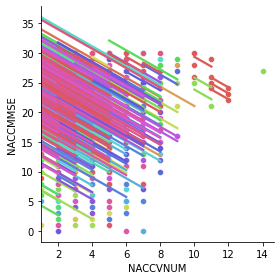

In [37]:
import pingouin as pg
import warnings
import numpy as np
warnings.simplefilter('ignore', np.RankWarning)
g = pg.plot_rm_corr(data=medicine, x='NACCVNUM', y='NACCMMSE', subject='NACCID')
#medicine[['NACCID','NACCVNUM','NACCMMSE','NACCADMD','NACCUDSD']]

In [39]:
pg.rm_corr(data=medicine, x='NACCVNUM', y='NACCMMSE', subject='NACCID')

,r,dof,pval,CI95%,power
rm_corr,-0.614282,1343,2.438606e-140,"[-0.65, -0.58]",1.0


In [41]:
len(set(medicine['NACCID'])), len(set(not_medicine['NACCID']))

(692, 786)

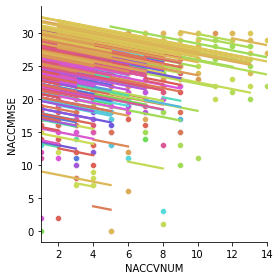

In [40]:
g = pg.plot_rm_corr(data=not_medicine, x='NACCVNUM', y='NACCMMSE', subject='NACCID')
#not_medicine[['NACCID','NACCVNUM','NACCMMSE','NACCADMD','NACCUDSD']]

# TODO: Correlation Plots 